<a href="https://colab.research.google.com/github/IsharabAhmed/colab-HomeWork/blob/main/face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Common imports
import os
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# TensorFlow imports
# may differs from version to versions

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Dataset information

image_folder = os.path.join('realFake', 'train')
img_height, img_width = 250, 250  # size of images
num_classes = 2  # me - not_me

# 'face_dataset_train_images' and 'face_dataset_test_images' folders follow next structure:
# | - dataset_folder (face_dataset_train_images/face_dataset_test_images)
#     | - class_1
#         | - img1.jpg
#         | - img2.jpg
#         | - ...
#     | - class_2
#         | - img1.jpg
#         | - img2.jpg
#         | - ...
#     | - ...

# In my case
# | - face_dataset_train_images
#     | - me
#         | - ...
#     | - not_me
#         | - ...

In [5]:
dataset = keras.preprocessing.image_dataset_from_directory(
    image_folder,
    seed=42,
    image_size=(img_height, img_width),
    label_mode='categorical',
    shuffle=True)

# Initial dataset is 195 images, but it can became several times larger

Found 100 files belonging to 2 classes.


In [6]:
class_names = dataset.class_names
class_names

['fake', 'real']

In [7]:
# Helper function to get classname of the image
def get_classname(class_names, real):
    '''
    Returns an element of the array 'class_names' with the index
    where the maximum value from the 'mask' array is located.
    Used to get classname with categorical labels.

    Parameters:
        class_names (array-like): Target array
        mask (array-like): Mask array, elements must be numbers
    Returns:
        One of the element from 'class_names'

    >>> get_classname(['first', 'second'], [0, 1])
    'second'
    >>> get_classname(['first', 'second', third], [1, 0, 0])
    'first'
    '''

    assert len(class_names) == len(
        real), "The arrays must be of the same length"

    return class_names[np.array(real).argmax(axis=0)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


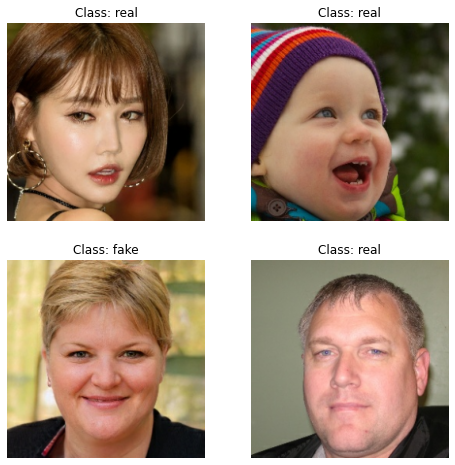

In [8]:
sqrt_img = 2  # images per row / col.
# The square root of the total number of images shown

plt.figure(figsize=(8, 8))
for images, labels in dataset.take(3):
    for index in range(sqrt_img**2):
        # grid 'sqrt_img' x 'sqrt_img'
        plt.subplot(sqrt_img, sqrt_img, index + 1)
        plt.imshow(images[index] / 255)
        class_name = get_classname(class_names, labels[index])
        plt.title("Class: {}".format(class_name))
        plt.axis("off")

In [9]:
batch_size = 16 

In [10]:
# Create data generator based on ImageDataGenerator object

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.7, 1),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    image_folder,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 100 images belonging to 2 classes.


(-0.5, 249.5, 249.5, -0.5)

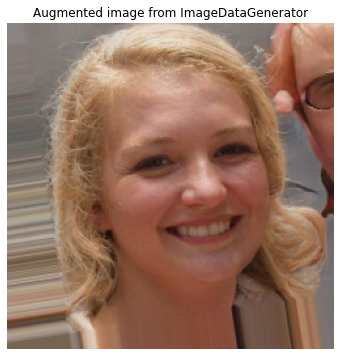

In [11]:
# To see next augmented image
image, label = train_generator.next()

plt.figure(figsize=(6, 6))
plt.imshow(image[0] / 255)  # first image from batch
plt.title("Augmented image from ImageDataGenerator")
plt.axis("off")

In [12]:
n = 10

aug_image_folder = os.path.join('datasets', 'face_dataset_train_aug_images')
if not os.path.exists(aug_image_folder):
    os.makedirs(aug_image_folder)  # create folder if doesn't exist

# Note that the content of the folder is not deleted and files are added at every step

In [13]:
train_generator.save_to_dir = aug_image_folder
train_generator.save_format = 'jpg'

# If 'save_to_dir' is set, `next()` method
# will generate `batch_size` images each time 
# and save them to 'save_to_dir' folder

for i in range(n):
    print("Step {} of {}".format(i+1, n))
    train_generator.next()
    print("\tGenerate {} random images".format(train_generator.batch_size))

print("\nTotal number images generated = {}".format(n*train_generator.batch_size))

Step 1 of 10
	Generate 16 random images
Step 2 of 10
	Generate 16 random images
Step 3 of 10
	Generate 16 random images
Step 4 of 10
	Generate 16 random images
Step 5 of 10
	Generate 16 random images
Step 6 of 10
	Generate 16 random images
Step 7 of 10
	Generate 16 random images
Step 8 of 10
	Generate 16 random images
Step 9 of 10
	Generate 16 random images
Step 10 of 10
	Generate 16 random images

Total number images generated = 160


In [14]:
n = 5

aug_image_folder = os.path.join('datasets', 'face_dataset_train_aug_images')
if not os.path.exists(aug_image_folder):
    os.makedirs(aug_image_folder)  # create folder if doesn't exist

# Note that the content of the folder is not deleted and files are added at every step

In [15]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.7, 1),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

In [16]:
# classes: 'me' and 'not_me'
image_folder_to_generate = os.path.join(image_folder, 'real')
image_folder_to_save = os.path.join(aug_image_folder, 'real')
if not os.path.exists(image_folder_to_save):
    os.makedirs(image_folder_to_save)  # create folder if doesn't exist

i = 0
total = len(os.listdir(image_folder_to_generate))  # number of files in folder
for filename in os.listdir(image_folder_to_generate):
    print("Step {} of {}".format(i+1, total))
    # for each image in folder: read it
    image_path = os.path.join(image_folder_to_generate, filename)
    image = keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width, 3))
    image = keras.preprocessing.image.img_to_array(
        image)  # from image to array
    # shape from (250, 250, 3) to (1, 250, 250, 3)
    image = np.expand_dims(image, axis=0)

    # create ImageDataGenerator object for it
    current_image_gen = train_datagen.flow(image,
                                           batch_size=1,
                                           save_to_dir=image_folder_to_save,
                                           save_prefix=filename,
                                           save_format="jpg")

    # generate n samples
    count = 0
    for image in current_image_gen:  # accessing the object saves the image to disk
        count += 1
        if count == n:  # n images were generated
            break
    print('\tGenerate {} samples for file {}'.format(n, filename))
    i += 1

print("\nTotal number images generated = {}".format(n*total))

Step 1 of 50
	Generate 5 samples for file 0 (9).jpg
Step 2 of 50
	Generate 5 samples for file 0 (15).jpg
Step 3 of 50
	Generate 5 samples for file 0 (20).jpg
Step 4 of 50
	Generate 5 samples for file 0 (21).jpg
Step 5 of 50
	Generate 5 samples for file 0 (13).jpg
Step 6 of 50
	Generate 5 samples for file 0 (10).jpg
Step 7 of 50
	Generate 5 samples for file 0 (6).jpg
Step 8 of 50
	Generate 5 samples for file 0 (33).jpg
Step 9 of 50
	Generate 5 samples for file 0 (29).jpg
Step 10 of 50
	Generate 5 samples for file 0 (40).jpg
Step 11 of 50
	Generate 5 samples for file 0 (3).jpg
Step 12 of 50
	Generate 5 samples for file 0 (46).jpg
Step 13 of 50
	Generate 5 samples for file 0 (41).jpg
Step 14 of 50
	Generate 5 samples for file 0 (43).jpg
Step 15 of 50
	Generate 5 samples for file 0 (17).jpg
Step 16 of 50
	Generate 5 samples for file 0 (45).jpg
Step 17 of 50
	Generate 5 samples for file 0 (37).jpg
Step 18 of 50
	Generate 5 samples for file 0 (30).jpg
Step 19 of 50
	Generate 5 samples for fi

In [17]:
# Common imports
import os
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
# TensorFlow imports
# may differs from version to versions

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing import image

In [20]:
# Dataset information

# Test dataset is set explicitly, because the amount of data is very small
train_image_folder = os.path.join('realFake', 'train')
test_image_folder = os.path.join('realFake', 'test')
img_height, img_width = 250, 250  # size of images
num_classes = 2  # me - not_me

# Training settings
validation_ratio = 0.15  # 15% for the validation
batch_size = 16

AUTOTUNE = tf.data.AUTOTUNE

In [21]:
# Train and validation sets
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_image_folder,
    validation_split=validation_ratio,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=batch_size,
    shuffle=True)

val_ds = keras.preprocessing.image_dataset_from_directory(
    train_image_folder,
    validation_split=validation_ratio,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=True)

Found 100 files belonging to 2 classes.
Using 85 files for training.
Found 100 files belonging to 2 classes.
Using 15 files for validation.


In [22]:
# Test set
test_ds = keras.preprocessing.image_dataset_from_directory(
    test_image_folder,
    image_size=(img_height, img_width),
    label_mode='categorical',
    shuffle=False)

Found 102 files belonging to 2 classes.


In [23]:
class_names = test_ds.class_names
class_names

['fake', 'real']

In [24]:
base_model = keras.applications.ResNet50(weights='imagenet',
                                         include_top=False,  # without dense part of the network
                                         input_shape=(img_height, img_width, 3))

94781440/94765736 [==============================] - 1s 0us/step


In [25]:
# Set layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False

In [26]:
# Add custom layers on top of ResNet
global_avg_pooling = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(num_classes, activation='sigmoid')(global_avg_pooling)

face_classifier = keras.models.Model(inputs=base_model.input,
                                     outputs=output,
                                     name='ResNet50')
face_classifier.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 125, 125, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 125, 125, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [27]:
# ModelCheckpoint to save model in case of interrupting the learning process
checkpoint = ModelCheckpoint("models/face_classifier.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

# EarlyStopping to find best model with a large number of epochs
earlystop = EarlyStopping(monitor='val_loss',
                          restore_best_weights=True,
                          patience=3,  # number of epochs with no improvement after which training will be stopped
                          verbose=1)

callbacks = [earlystop, checkpoint]

In [28]:
face_classifier.compile(loss='categorical_crossentropy',
                        optimizer=keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['accuracy'])

In [29]:
epochs = 50

In [30]:
history = face_classifier.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds)

face_classifier.save("models/face_classifier.h5")

Epoch 1/50
6/6 [==============================] - 22s 3s/step - loss: 1.9238 - accuracy: 0.5882 - val_loss: 1.2389 - val_accuracy: 0.6667

Epoch 00001: val_loss improved from inf to 1.23892, saving model to models/face_classifier.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
6/6 [==============================] - 18s 3s/step - loss: 1.0582 - accuracy: 0.6588 - val_loss: 1.1517 - val_accuracy: 0.6000

Epoch 00002: val_loss improved from 1.23892 to 1.15173, saving model to models/face_classifier.h5
Epoch 3/50
6/6 [==============================] - 18s 3s/step - loss: 0.2579 - accuracy: 0.8706 - val_loss: 0.9867 - val_accuracy: 0.6667

Epoch 00003: val_loss improved from 1.15173 to 0.98666, saving model to models/face_classifier.h5
Epoch 4/50
6/6 [==============================] - 18s 3s/step - loss: 0.1510 - accuracy: 0.9412 - val_loss: 1.4782 - val_accuracy: 0.6000

Epoch 00004: val_loss did not improve from 0.98666
Epoch 5/50
6/6 [==============================] - 17s 3s/step - loss: 0.1488 - accuracy: 0.9176 - val_loss: 1.4200 - val_accuracy: 0.6000

Epoch 00005: val_loss did not improve from 0.98666
Epoch 6/50
6/6 [==============================] - 17s 3s/step - loss: 0.1281 - accuracy: 0.9412 - val_loss: 1.3521 - val_accuracy: 0.6000
Restorin

In [31]:
def test_image_classifier_with_folder(model, path, y_true, img_height=250, img_width=250, class_names=['real', 'fake']):
    '''
    Read all images from 'path' using tensorflow.keras.preprocessing.image module, 
    than classifies them using 'model' and compare result with 'y_true'.
    Calculate total accuracy based on 'path' test set.

    Parameters:
        model : Image classifier
        path (str): Path to the folder with images you want to test classifier on 
        y_true : True label of the images in the folder. Must be in 'class_names' list
        img_height (int): The height of the image that the classifier can process 
        img_width (int): The width of the image that the classifier can process
        class_names (array-like): List of class names 

    Returns:
        None
    '''
    num_classes = len(class_names)  # Number of classes
    total = 0  # number of images total
    correct = 0  # number of images classified correctly

    for filename in os.listdir(path):
        # read each image in the folder and classifies it
        test_path = os.path.join(path, filename)
        test_image = image.load_img(
            test_path, target_size=(img_height, img_width, 3))
        # from image to array, can try type(test_image)
        test_image = image.img_to_array(test_image)
        # shape from (250, 250, 3) to (1, 250, 250, 3)
        test_image = np.expand_dims(test_image, axis=0)
        result = model.predict(test_image)

        y_pred = class_names[np.array(result[0]).argmax(
            axis=0)]  # predicted class
        iscorrect = 'correct' if y_pred == y_true else 'incorrect'
        print('{} - {}'.format(iscorrect, filename))
        for index in range(num_classes):
            print("\t{:6} with probabily of {:.2f}%".format(
                class_names[index], result[0][index] * 100))

        total += 1
        if y_pred == y_true:
            correct += 1

    print("\nTotal accuracy is {:.2f}% = {}/{} samples classified correctly".format(
        correct/total*100, correct, total))

In [32]:
model_name = 'face_classifier.h5'
face_classifier = keras.models.load_model(f'models/{model_name}')

In [34]:
test_image_classifier_with_folder(face_classifier,
                                  'realFake/test/real',
                                  y_true='real')

incorrect - 0 (1542).jpg
	real   with probabily of 0.04%
	fake   with probabily of 99.99%
incorrect - 0 (1508).jpg
	real   with probabily of 42.17%
	fake   with probabily of 81.18%
correct - 0 (1501).jpg
	real   with probabily of 74.02%
	fake   with probabily of 17.81%
correct - 0 (1514).jpg
	real   with probabily of 98.88%
	fake   with probabily of 11.28%
incorrect - 0 (1505).jpg
	real   with probabily of 0.02%
	fake   with probabily of 99.99%
incorrect - 0 (1512).jpg
	real   with probabily of 0.16%
	fake   with probabily of 99.97%
incorrect - 0 (1537).jpg
	real   with probabily of 36.53%
	fake   with probabily of 88.88%
incorrect - 0 (1531).jpg
	real   with probabily of 6.48%
	fake   with probabily of 98.36%
incorrect - 0 (1502).jpg
	real   with probabily of 12.92%
	fake   with probabily of 97.18%
incorrect - 0 (1543).jpg
	real   with probabily of 65.54%
	fake   with probabily of 81.55%
correct - 0 (1510).jpg
	real   with probabily of 65.65%
	fake   with probabily of 28.21%
incorrect

In [35]:
test_image_classifier_with_folder(face_classifier,
                                  'realFake/test/fake',
                                  y_true='fake')

incorrect - 0 (1542).jpg
	real   with probabily of 95.88%
	fake   with probabily of 13.17%
incorrect - 0 (1508).jpg
	real   with probabily of 65.81%
	fake   with probabily of 60.17%
incorrect - 0 (1501).jpg
	real   with probabily of 97.59%
	fake   with probabily of 9.36%
correct - 0 (1514).jpg
	real   with probabily of 4.09%
	fake   with probabily of 98.71%
incorrect - 0 (1505).jpg
	real   with probabily of 98.48%
	fake   with probabily of 2.40%
incorrect - 0 (1512).jpg
	real   with probabily of 67.16%
	fake   with probabily of 52.77%
incorrect - 0 (1537).jpg
	real   with probabily of 66.65%
	fake   with probabily of 40.60%
incorrect - 0 (1531).jpg
	real   with probabily of 78.53%
	fake   with probabily of 49.22%
incorrect - 0 (1502).jpg
	real   with probabily of 73.25%
	fake   with probabily of 40.57%
incorrect - 0 (1543).jpg
	real   with probabily of 51.11%
	fake   with probabily of 46.14%
incorrect - 0 (1510).jpg
	real   with probabily of 92.44%
	fake   with probabily of 32.30%
inco

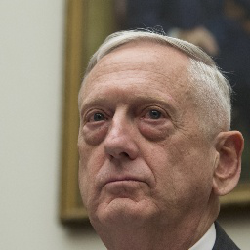

In [36]:
test_path = '/content/realFake/test/real/0 (1508).jpg'
test_image = image.load_img(test_path, target_size=(img_height, img_width, 3))
test_image

In [37]:
test_image = image.img_to_array(test_image)  # from image to array
# shape from (250, 250, 3) to (1, 250, 250, 3)
test_image = np.expand_dims(test_image, axis=0)
result = face_classifier.predict(test_image)

for index in range(num_classes):
    print("{:6} with probabily of {:.2f}%".format(
        class_names[index], result[0][index] * 100))

fake   with probabily of 42.17%
real   with probabily of 81.18%
